In [3]:
#Import the Data
mov <- read.csv("Movies Dataset.csv")

## Data Exploration

In [4]:
head(mov)

,Day.of.Week,Director,Genre,Movie.Title,Release.Date,Studio,Adjusted.Gross...mill.,Budget...mill.,Gross...mill.,IMDb.Rating,MovieLens.Rating,Overseas...mill.,Overseas.,Profit...mill.,Profit.,Runtime..min.,US...mill.,Gross...US
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
2,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
4,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
5,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
6,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5


In [5]:
summary(mov)

 Day.of.Week          Director            Genre           Movie.Title       
 Length:608         Length:608         Length:608         Length:608        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Release.Date          Studio          Adjusted.Gross...mill. Budget...mill.  
 Length:608         Length:608         Length:608             Min.   :  0.60  
 Class :character   Class :character   Class :character       1st Qu.: 45.00  
 Mode  :character   Mode  :character   Mode  :character       Median : 80.00  
                                                              Mean   : 92.47  
                                                              3rd 

In [6]:
str(mov)

'data.frame':	608 obs. of  18 variables:
 $ Day.of.Week           : chr  "Friday" "Friday" "Friday" "Friday" ...
 $ Director              : chr  "Brad Bird" "Scott Waugh" "Patrick Hughes" "Phil Lord, Chris Miller" ...
 $ Genre                 : chr  "action" "action" "action" "comedy" ...
 $ Movie.Title           : chr  "Tomorrowland" "Need for Speed" "The Expendables 3" "21 Jump Street" ...
 $ Release.Date          : chr  "22/05/2015" "14/03/2014" "15/08/2014" "16/03/2012" ...
 $ Studio                : chr  "Buena Vista Studios" "Buena Vista Studios" "Lionsgate" "Sony" ...
 $ Adjusted.Gross...mill.: chr  "202.1" "204.2" "207.1" "208.8" ...
 $ Budget...mill.        : num  170 66 100 42 150 80 50 85 70 5 ...
 $ Gross...mill.         : chr  "202.1" "203.3" "206.2" "201.6" ...
 $ IMDb.Rating           : num  6.7 6.6 6.1 7.2 8 5.8 6 6.8 6.3 5.9 ...
 $ MovieLens.Rating      : num  3.26 2.97 2.93 3.62 3.65 2.85 3.16 3.45 2.92 2.9 ...
 $ Overseas...mill.      : chr  "111.9" "159.7" "166.9" "

In [7]:
#Activate GGPlot2
#install.packages("ggplot2")
library(ggplot2)

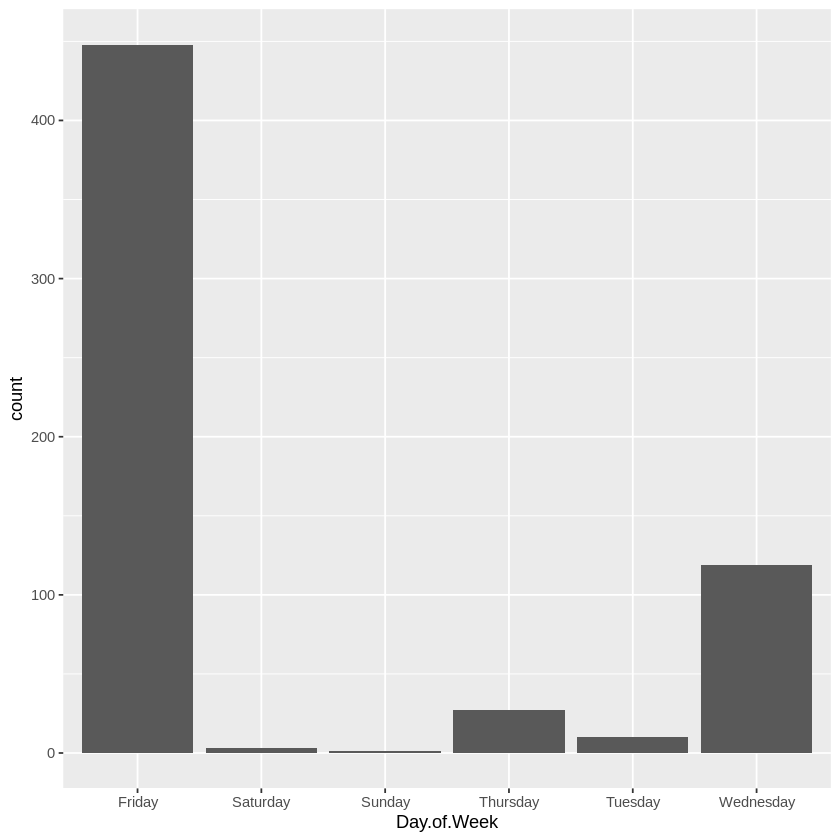

In [8]:
#Interesting Insight:
ggplot(data=mov, aes(x=Day.of.Week)) + geom_bar()
# No movies are released on a Monday. Ever.

In [9]:
#Filter dataset for desired genres:
filt <- (mov$Genre == "action") | (mov$Genre == "adventure") | (mov$Genre == "animation") | (mov$Genre == "comedy") | (mov$Genre == "drama")

In [10]:
#Filter dataset for desired studios:
filt2 <- (mov$Studio == "Buena Vista Studios") | (mov$Studio == "WB") | (mov$Studio == "Fox") | (mov$Studio == "Universal") | (mov$Studio == "Sony") | (mov$Studio == "Paramount Pictures")

In [11]:
#Apply the row filters to the dataframe
mov2 <- mov[filt & filt2,]

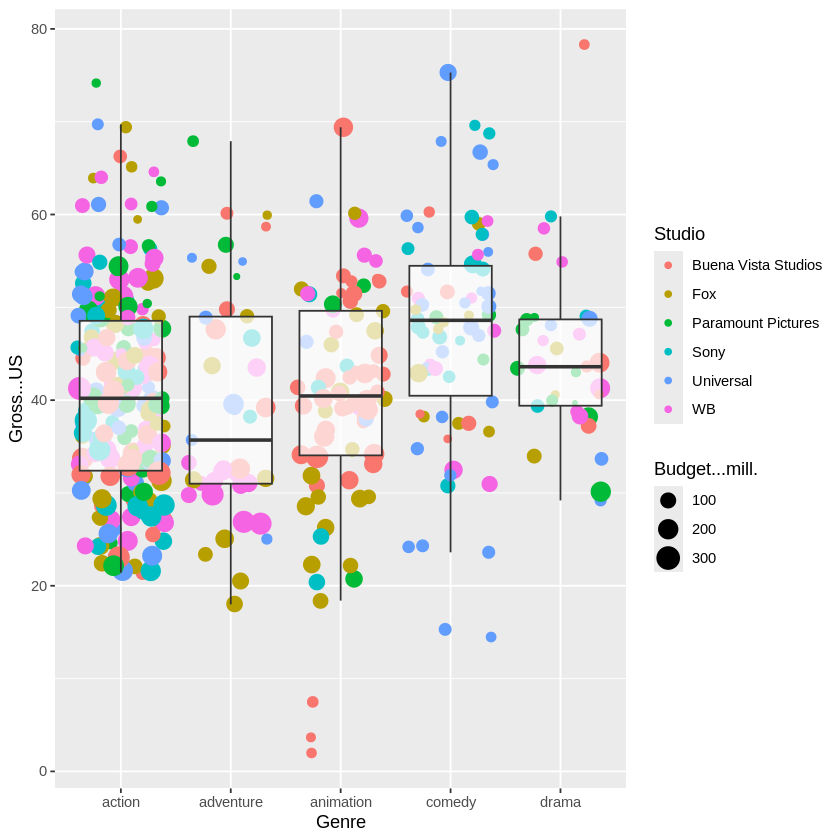

In [12]:
#Prepare the plot's data and aes layers

#Use str() or summary() to fin out the correct column names
p <- ggplot(data=mov2, aes(x=Genre, y=Gross...US))

#Add layers
p +
  geom_jitter(aes(size=Budget...mill., colour=Studio)) +
  geom_boxplot(alpha = 0.7, outlier.colour = NA) #alpha for transparency

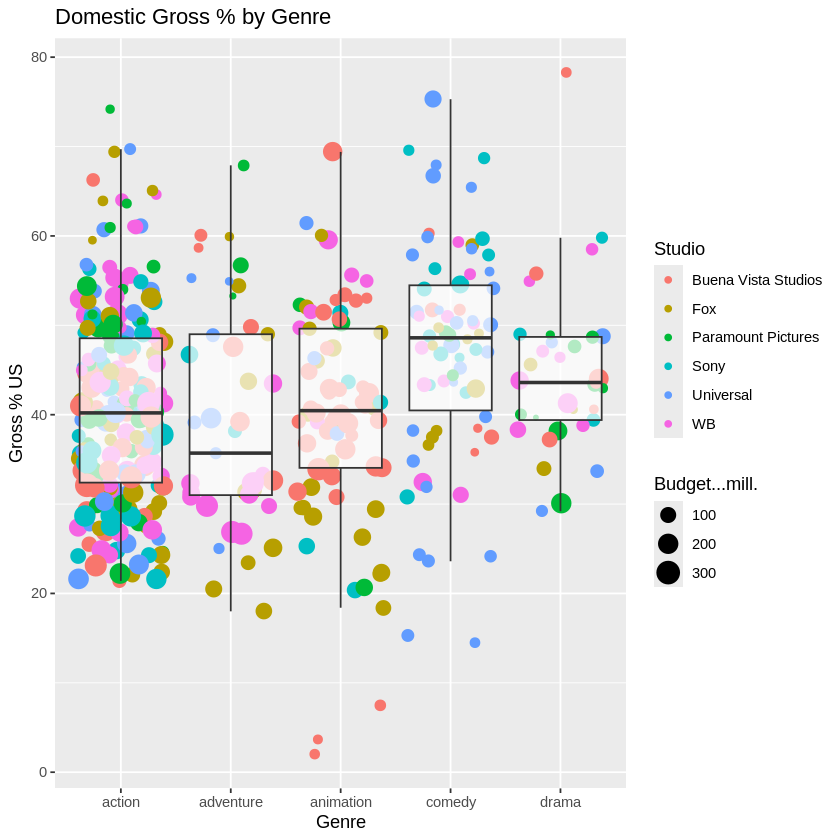

In [13]:
#Place into a new object:
q <- p +
  geom_jitter(aes(size=Budget...mill., colour=Studio)) +
  geom_boxplot(alpha = 0.7, outlier.colour = NA)

#Non-data ink
q +
  xlab("Genre") + #x axis title
  ylab("Gross % US") + #y axis title
  ggtitle("Domestic Gross % by Genre") #plot title

#Theme
q <- q +
  theme(
    #this is a shortcut to alter ALL text elements at once:
    text = element_text(family="Times New Roman"),

    #Axes titles:
    axis.title.x = element_text(colour="Blue", size=30),
    axis.title.y = element_text(colour="Blue", size=30),

    #Axes texts:
    axis.text.x = element_text(size=20),
    axis.text.y = element_text(size=20),

    #Plot title:
    plot.title = element_text(colour="Black",
                              size=40),
    #Legend title:
    legend.title = element_text(size=20),

    #Legend text
    legend.text = element_text(size=12)
  )
